#**3. PCA:**
a. Visualize the data from the file DataPCA.csv. 

b. Train PCA. 

c. Plot the variance explained versus PCA dimensions. 

d. Reconstruct the data with various numbers of PCA dimensions, and compute the MSE. 


##**Import the libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as pCA
from sklearn.metrics import mean_squared_error
import plotly.express as px
import seaborn as sb

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Data Visualization**

          x1        x2        x3        x4        x5        x6        x7
x1  1.000000 -0.215312  0.845144 -0.925055 -0.438377 -0.797697 -0.600302
x2 -0.215312  1.000000  0.330902 -0.023173 -0.699865 -0.205240  0.551619
x3  0.845144  0.330902  1.000000 -0.883491 -0.835252 -0.920829 -0.218335
x4 -0.925055 -0.023173 -0.883491  1.000000  0.522152  0.774758  0.627162
x5 -0.438377 -0.699865 -0.835252  0.522152  1.000000  0.834780 -0.327854
x6 -0.797697 -0.205240 -0.920829  0.774758  0.834780  1.000000  0.058808
x7 -0.600302  0.551619 -0.218335  0.627162 -0.327854  0.058808  1.000000


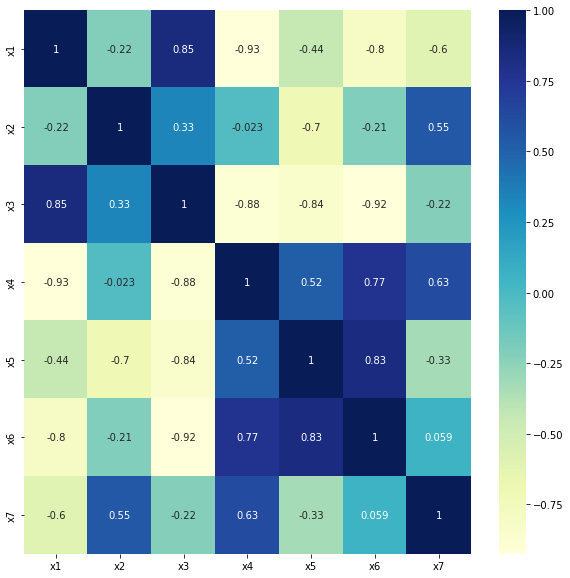

In [7]:
df = pd.read_csv("/content/drive/MyDrive/DataAssignment3/DataPCA.csv")
print(df.corr())
plt.figure(figsize=(10,10))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Observation**

* x1 is highly correlated with x3,x4 and x6
* x2 is mostly uncorrelated with other features
* x3 is highly correlated with x1,x4,x5,x6
* x4 is highly correlated with x1,x3,x6
* x5 is highly correlated with x3,x6
* x6 is highly correlated with x1,x3,x4,x5
* x7 is mostly uncorrelated with other features




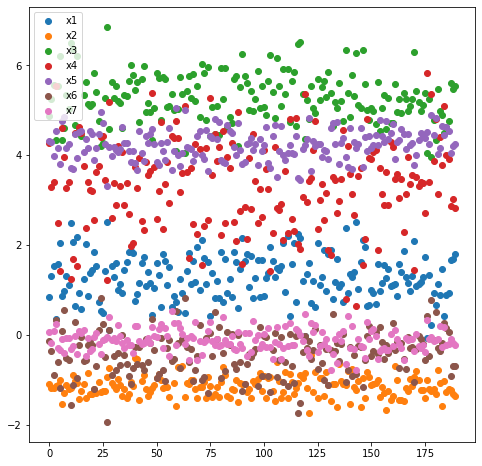

In [8]:
x=np.arange(0,df.shape[0],1)
plt.figure(figsize=(8,8))
for i in range(df.shape[1]):
  p=str(i+1)
  plt.scatter(x,df.iloc[:,i],label='x'+p)
  plt.legend()

On observing the scatter plot it can be said that x3, x4, x5 have larger variance since their variation is larger in Y axis.

##**PCA**

In [9]:
def PCA(org_data , num_components):
    
   
     
    mean = np.mean(org_data, axis= 0)
    #Step-1 Data Centering/Normalization
    """ We standardize/normalize data before performing PCA. Normalization is typically performed so that all features are on the same scale. 
    For instance, we have various features for a housing price prediction dataset. The price is in dollars, and the area is measured in square feet.
    The algorithm will now prioritise the numerical value with the higher numerical value. As a result, we must normalise all of the features that fall
    within the same range. Mean centering is used to ensure that the first Principal Component is pointing in the direction of the greatest variance.
    Mean centering will be performed by subtracting mean from all features or channels."""

    mean_data = org_data - mean
     
    #Step-2 Make a covariance matrix.
    """ The covariance of all feature dimensions is now computed. Each covariance matrix is symmetric and has a positive semi-definite value. 
    It has eigenvectors that are orthogonal. """
    cov = np.cov(mean_data.T)
    cov = np.round(cov, 2)
     
    #Step-3 Compute the covariance matrix's eigenvectors.
    """ We will now decompose the covariance matrix into eigen vectors and eigen values by performing an eigen decomposition. 
    (The number of eigenvalues/vectors equals the number of features/channels.) """
    eig_val, eig_vec = np.linalg.eig(cov)
     
    #Step-4 sorting eign values
    """ Each eigen vector represents a variance direction. The direction of maximum variance will be given by the eigen vector corresponding to the largest eigen value. 
    This is the first major component. The direction of the second largest variance will then be given by the eigen vector corresponding to the second largest eigen value.
     This is the second most important component. And so forth. As a result, we must sort the eigen vectors in descending order of eigen values.  """
    indices = np.arange(0,len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]

     
    #Step-5 Calculate the explained variance and choose N components.
    """ We can choose the top k eigenvectors based on how much compression we require.
        The explained variance of each feature is the best way to choose the number of components. 
        By dividing the eigenvalues by the sum of all eigenvalues, we can compute explained variance. 
        The cumulative sum of all eigenvalues is then computed. """
    eigenvector_subset = eig_vec[:,0:num_components]
     
    #Step-6 Use eigen vectors to transform data.
    """ To get projections of our data in the direction of these eigen vectors, we'll dot product our data with the eigen vectors. """
    pca_data = np.dot(mean_data, eigenvector_subset)

    #Step-7 Reconstruct original data by inverting PCA.
    """ By taking the dot product of the transpose of the eigen vectors with the transformed data, we can reconstruct the original data. 
        Remember that we subtracted the mean from the data to centre it at the start. So now we must also include the mean. 
        All the eigen vectors are orthogonal to each other. We get an identity matrix by doing the dot product of eigen vectors with themselves. """
    reconst=pd.DataFrame(np.dot(pca_data , eigenvector_subset.T), columns = ['x1','x2','x3','x4','x5','x6','x7'])+mean.T
    mse =mean_squared_error(reconst, org_data)
    #pca = pCA(n_components=num_components)
    #pca.fit(org_data)
    #var_values = list(pca.explained_variance_ratio_)
    return pca_data,reconst,mse

In [11]:
#prepare the data
x =pd.read_csv("/content/drive/MyDrive/DataAssignment3/DataPCA.csv")

################################ 
"""Using the PCA function, we can obtain the first principle components and their mse by subtracting the reconstructed matrix. """
mat_reduced_1,reconst_1,mse_1 = PCA(x , 1)
principal_df1 = pd.DataFrame(mat_reduced_1 , columns = ['PC1'])
print(principal_df1)


################################
"""Using the PCA function, we can obtain the first two principle components and their mse by subtracting the reconstructed matrix."""
mat_reduced_2,reconst_2,mse_2 = PCA(x , 2)
principal_df2 = pd.DataFrame(mat_reduced_2 , columns = ['PC1','PC2'])
print(principal_df2)


################################
"""Using the PCA function, we can obtain the first three principle components and their mse by subtracting the reconstructed matrix."""
mat_reduced_3,reconst_3,mse_3 = PCA(x , 3)
principal_df3 = pd.DataFrame(mat_reduced_3 , columns = ['PC1','PC2','PC3'])
print(principal_df3)


################################
"""Using the PCA function, we can obtain the first four principle components and their mse by subtracting the reconstructed matrix."""
mat_reduced_4,reconst_4,mse_4= PCA(x , 4)
principal_df4 = pd.DataFrame(mat_reduced_4 , columns = ['PC1','PC2','PC3','PC4'])
print(principal_df4)


################################

"""Using the PCA function, we can obtain the first five principle components and their mse by subtracting the reconstructed matrix."""
mat_reduced_5,reconst_5,mse_5 = PCA(x , 5)
principal_df5 = pd.DataFrame(mat_reduced_5 , columns = ['PC1','PC2','PC3','PC4','PC5'])
print(principal_df5)


################################

"""Using the PCA function, we can obtain the first six principle components and their mse by subtracting the reconstructed matrix."""
mat_reduced_6,reconst_6,mse_6= PCA(x , 6)
principal_df6 = pd.DataFrame(mat_reduced_6 , columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
print(principal_df6)


################################

"""We measured the MSE of the entire matrix after reconstructing it using PCA on all of its components."""
mat_reduced_7,reconst_7,mse_7= PCA(x , 7)
principal_df7 = pd.DataFrame(mat_reduced_7 , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
print(principal_df7)



          PC1
0    1.140404
1   -0.025611
2   -0.351011
3    2.695279
4   -0.949365
..        ...
185  1.138825
186  0.952697
187 -0.833791
188 -0.574880
189 -0.795846

[190 rows x 1 columns]
          PC1       PC2
0    1.140404 -0.201938
1   -0.025611  0.105562
2   -0.351011 -0.459627
3    2.695279 -0.271716
4   -0.949365  0.174739
..        ...       ...
185  1.138825  0.450168
186  0.952697  0.322713
187 -0.833791 -0.156322
188 -0.574880  0.086321
189 -0.795846  0.190084

[190 rows x 2 columns]
          PC1       PC2       PC3
0    1.140404 -0.201938 -0.026739
1   -0.025611  0.105562  0.005459
2   -0.351011 -0.459627 -0.397328
3    2.695279 -0.271716 -0.143479
4   -0.949365  0.174739  0.150608
..        ...       ...       ...
185  1.138825  0.450168  0.095881
186  0.952697  0.322713  0.125423
187 -0.833791 -0.156322 -0.275706
188 -0.574880  0.086321 -0.306052
189 -0.795846  0.190084 -0.290397

[190 rows x 3 columns]
          PC1       PC2       PC3       PC4
0    1.140404 -0.201

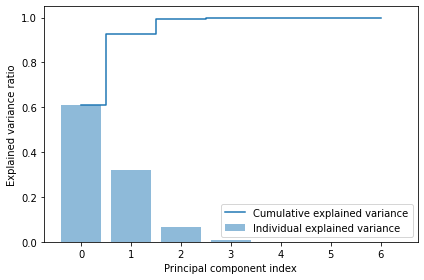

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=x
sc.fit(X)
X_std = sc.transform(X)

# Call PCA function
pca = pCA()
# Transform features
X_pca = pca.fit_transform(X_std)
# Determine explained variance using scikit learn
var_pca = pca.explained_variance_ratio_
# The cumulative sum of eigenvalues will be used to generate a step plot.
# In order to visualise the variance explained by each principal component
cumsum_eig = np.cumsum(var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(var_pca)), var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumsum_eig)), cumsum_eig, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

When deciding how many principal components to use from your new feature space, you can look at explained variance to see how much information is available for each principal component. When I look at the principal components in your data, I see that the first three principal components account for 85 percent of the variance. Also the we can observe the last PC's have less variance, so ignoring will not affect our reconstructed data.

The explained variance plot shows that the first three PCA components contribute significantly more than other features in dimension reduction, implying that taking the first three components is sufficient to achieve high accuracy.

[0.04426619016297815, 0.011229235356912783, 0.0019875893848561124, 0.00019199264729433024, 0.00015176355203010567, 0.00012316939015570057, 3.864797575809957e-31]


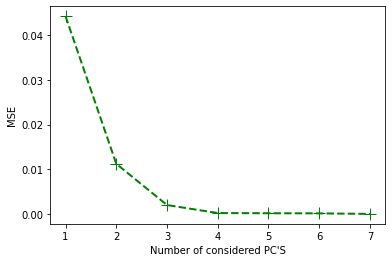

In [13]:
#We obtained the MSE for reconstructed data from the PCA function, and we are plotting it here by making a list for each dimension reduction.
loss_df=[mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7]
plt.plot(np.arange(1,8), loss_df, color='green', marker='+', linestyle='dashed',linewidth=2, markersize=12)
plt.ylabel('MSE')
plt.xlabel("Number of considered PC'S")
print(loss_df)

It can be observed that the MSE reduces as we increase the number PC's.